In [86]:
from lisp import parse, eval

node1 = "(define a (lambda (x) (+ 1 x)))"
node2 = "(define b (lambda (x) (+ 2 x)))"
node3 = "(define c (lambda (x) (+ 3 x)))"
node4 = "(define d (lambda (x) (+ 4 x)))"

eval(parse(node1))
eval(parse(node2))
eval(parse(node3))
eval(parse(node4))

eval(parse("(a (b (c 10)))"))


16

In [47]:
parse_tree = parse("(a (b (c 10)))")
parse_tree

['a', ['b', ['c', 10]]]

In [48]:
parse_tree = parse("(a (b (d 10)))")
parse_tree

['a', ['b', ['d', 10]]]

In [56]:
eval(parse("(c 10)"))

13

In [42]:
import networkx as nx

def add_edges(parse_tree, graph : nx.DiGraph):
    for item in parse_tree:
        print(item)
        if isinstance(item, list):
            add_edges(item, graph)

parse_tree = parse("(node_a (node_b (node_c 10)))")
G = nx.DiGraph()
add_edges(parse_tree=parse_tree, graph=G)



node_a
['node_b', ['node_c', 10]]
node_b
['node_c', 10]
node_c
10


In [62]:
combine = """(define combine (lambda (f)
    (lambda (x y)
      (if (null? x) (quote ())
          (f (list (car x) (car y))
             ((combine f) (cdr x) (cdr y)))))))"""

shuffle = """(define riff-shuffle (lambda (deck) (begin
    (define take (lambda (n seq) (if (<= n 0) (quote ()) (cons (car seq) (take (- n 1) (cdr seq))))))
    (define drop (lambda (n seq) (if (<= n 0) seq (drop (- n 1) (cdr seq)))))
    (define mid (lambda (seq) (/ (length seq) 2)))
    ((combine append) (take (mid deck) deck) (drop (mid deck) deck)))))"""
    
eval(parse(combine))
eval(parse(shuffle))
eval(parse("(riff-shuffle (list 1 2 3 4 5 6 7 8))"))

[1, 5, 2, 6, 3, 7, 4, 8]

In [75]:
eval(parse("(list (a 10)(b 10)(c 10))"))

[11, 12, 13]

In [76]:
parse("(list (a 10)(b 10)(c 10))")

['list', ['a', 10], ['b', 10], ['c', 10]]

In [77]:
parse("(a (b (c 10)))")

['a', ['b', ['c', 10]]]

In [87]:
parse("(d (b (c 10)))")

['d', ['b', ['c', 10]]]

In [81]:
random = "(define bc (lambda (x) (b (c x))))"
eval(parse(random))
eval(parse("(bc 10)"))

15

In [88]:
eval(parse("(a (bc 10))"))

19

In [89]:
eval(parse("(d (bc 10))"))

19

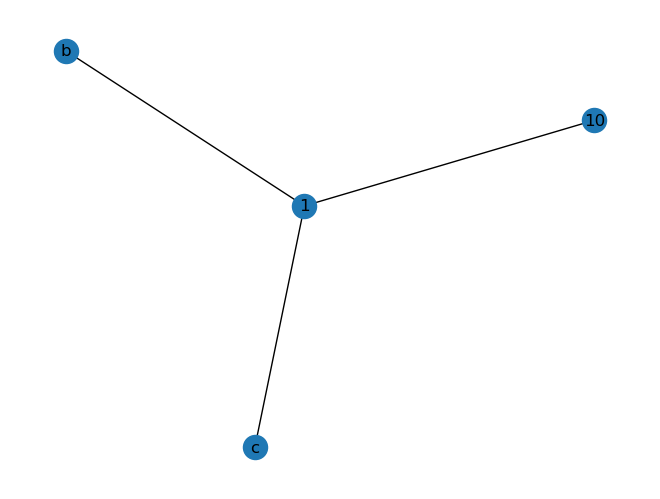

In [61]:
import networkx as nx

def nested_list_to_graph(nested_list):
    G = nx.Graph()
    def add_edges(lst, parent=None):
        for i, item in enumerate(lst):
            if isinstance(item, list):
                add_edges(item, parent=i)
            else:
                if parent is not None:
                    G.add_edge(parent, item)
    add_edges(nested_list)
    return G

nested_list = ['a', ['b', ['c', 10]]]
G = nested_list_to_graph(nested_list)
nx.draw(G, with_labels=True)


In [24]:
from stitch_core import compress

programs = [
    "(lam (+ 3 (* (+ 3 4) 2)))",
    "(lam (map (lam (+ 3 (* 4 (+ 3 $0)))) $0))",
    "(lam (* 2 (+ 3 (* $0 (+ 3 1)))))"
]

res = compress(programs, iterations=2, max_arity=2)
print(res.abstractions)
print(res.rewritten)

[fn_0() := (+ 3), fn_1(#0,#1) := (* #1 (fn_0 #0))]
['(lam (fn_0 (* (fn_0 4) 2)))', '(lam (map (lam (fn_0 (fn_1 $0 4))) $0))', '(lam (fn_1 (fn_1 1 $0) 2))']


In [19]:
res.abstractions

[fn_0(#0,#1) := (+ 3 (* #1 #0)), fn_1() := (+ 2)]

In [16]:
from lisp import parse, eval

lambda_fn = "(define lam (lambda (x) x))"

node1 = "(lam (* 2 (+ 3 (* $0 (+ 2 1)))))"

eval(parse(lambda_fn))
eval(parse(node1))

LookupError: $0

In [8]:
res.abstractions

[fn_0(#0,#1) := (+ 3 (* #1 #0)), fn_1() := (+ 2)]

In [30]:
from stitch_core import compress

programs = [
    "(lam (node_a (node_b (node_c (node_e $0)))))",
    "(lam (node_a (node_b (node_d (node_f $0)))))"
    
]

res = compress(programs, iterations=2, max_arity=2)
print(res.abstractions)
print(res.rewritten)

[fn_0(#0,#1) := (lam (node_a (node_b (#1 (#0 $0)))))]
['(fn_0 node_e node_c)', '(fn_0 node_f node_d)']


In [ ]:
names = ["rohan", "mohan", "macmohan"]

import string

func_list = ["(define a (lambda (x) (+ 1 x)))" for (i,x) in enumerate(string.ascii_lowercase)]